In [25]:
import pandas as pd
import plotly.express as px
import scipy.stats as sts

In [4]:
df = pd.read_excel('ANZ synthesised transaction dataset.xlsx')
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [29]:
px.box(df,y='amount')

In [24]:
px.box(df,y='amount',x='movement')

In [28]:
sts.f_oneway(df[df['movement']=='credit']['amount'], df_new[df_new['movement']=='debit']['amount'])

F_onewayResult(statistic=26859.209331688064, pvalue=0.0)

#### From this, we can see that the transaction amount is averagely higher for credit transactions than in debit transactions. And the two distributions are very disimilar due to the the very low p-value. 

### Upper fence for amount is 110, hence, all other values are seen as outliers

In [51]:
df_new = df[df['amount']<=110]
df_new.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,Day_name
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,Ashmore,QLD,2018-08-01 01:01:15+00:00,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,Wednesday
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,Sydney,NSW,2018-08-01 01:13:45+00:00,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,Wednesday
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,Sydney,NSW,2018-08-01 01:26:15+00:00,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,Wednesday
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,Buderim,QLD,2018-08-01 01:38:45+00:00,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,Wednesday
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,Mermaid Beach,QLD,2018-08-01 01:51:15+00:00,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,Wednesday


In [32]:
df_new['movement'].value_counts()

debit    9978
Name: movement, dtype: int64

In [10]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10199 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             10199 non-null  object        
 1   card_present_flag  7378 non-null   float64       
 2   bpay_biller_code   2 non-null      object        
 3   account            10199 non-null  object        
 4   currency           10199 non-null  object        
 5   long_lat           10199 non-null  object        
 6   txn_description    10199 non-null  object        
 7   merchant_id        7378 non-null   object        
 8   merchant_code      0 non-null      float64       
 9   first_name         10199 non-null  object        
 10  balance            10199 non-null  float64       
 11  date               10199 non-null  datetime64[ns]
 12  gender             10199 non-null  object        
 13  age                10199 non-null  int64         
 14  mercha

In [16]:
#Visualizing the distribution of transaction amounts
px.histogram(df_new,'amount',nbins=25)

In [22]:
px.histogram(df_new[df_new['movement']=='debit'],'amount',nbins=25)

In [21]:
px.histogram(df_new[df_new['movement']=='credit'],'amount',nbins=25)

In [42]:
df['extraction']

0        2018-08-01T01:01:15.000+0000
1        2018-08-01T01:13:45.000+0000
2        2018-08-01T01:26:15.000+0000
3        2018-08-01T01:38:45.000+0000
4        2018-08-01T01:51:15.000+0000
                     ...             
12038    2018-10-31T23:09:06.000+0000
12039    2018-10-31T23:21:46.000+0000
12040    2018-10-31T23:34:25.000+0000
12041    2018-10-31T23:47:05.000+0000
12042    2018-10-31T23:59:44.000+0000
Name: extraction, Length: 12043, dtype: object

In [52]:
df_new['extraction'] = pd.to_datetime(df_new['extraction'],infer_datetime_format=True)
df_new['extraction'].head()

<ipython-input-52-cc7a62844aaf>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0   2018-08-01 01:01:15+00:00
1   2018-08-01 01:13:45+00:00
2   2018-08-01 01:26:15+00:00
3   2018-08-01 01:38:45+00:00
4   2018-08-01 01:51:15+00:00
Name: extraction, dtype: datetime64[ns, UTC]

In [54]:
df_new['Day_name'] = df_new['extraction'].dt.day_name()
df_new['Day_name'].head()

<ipython-input-54-7094e7a6a65c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0    Wednesday
1    Wednesday
2    Wednesday
3    Wednesday
4    Wednesday
Name: Day_name, dtype: object

In [74]:
df_new['Hour'] = df_new['extraction'].dt.hour
df_new['Hour'].head()

<ipython-input-74-256835e7bf46>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0    1
1    1
2    1
3    1
4    1
Name: Hour, dtype: int64

In [67]:
df_new['Day_num']=df_new['extraction'].dt.dayofweek
df_new['Day_num'].head()

<ipython-input-67-25a1255044a4>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0    2
1    2
2    2
3    2
4    2
Name: Day_num, dtype: int64

In [68]:
grouped_df = df_new.groupby('Day_name',as_index=False).#sum()
grouped_df

,Day_name,card_present_flag,merchant_code,balance,age,amount,Day_num
0,Friday,1016.0,0.0,21158857.98,52631,51934.10,6932
1,Monday,574.0,0.0,14301049.95,30715,32989.37,0
2,Saturday,1010.0,0.0,23203638.87,47587,42813.86,7780
3,Sunday,856.0,0.0,18120221.34,41366,40308.01,8460
4,Thursday,860.0,0.0,25099729.22,47638,45286.68,4575
5,Tuesday,642.0,0.0,17437121.78,36324,33892.25,1183
6,Wednesday,971.0,0.0,23172571.12,51854,52382.64,3492


In [71]:
grouped_df = grouped_df.sort_values(by='Day_num')
grouped_df

,Day_name,card_present_flag,merchant_code,balance,age,amount,Day_num
1,Monday,574.0,0.0,14301049.95,30715,32989.37,0
5,Tuesday,642.0,0.0,17437121.78,36324,33892.25,1183
6,Wednesday,971.0,0.0,23172571.12,51854,52382.64,3492
4,Thursday,860.0,0.0,25099729.22,47638,45286.68,4575
0,Friday,1016.0,0.0,21158857.98,52631,51934.10,6932
2,Saturday,1010.0,0.0,23203638.87,47587,42813.86,7780
3,Sunday,856.0,0.0,18120221.34,41366,40308.01,8460


In [73]:
px.line(grouped_df,x='Day_name',y='amount')

In [76]:
grouped_df_hour = df_new.groupby('Hour',as_index=False).sum()
grouped_df_hour

,Hour,card_present_flag,merchant_code,balance,age,amount,Day_num
0,0,88.0,0.0,836663.85,3004,2649.51,370
1,1,156.0,0.0,2479432.68,6091,5109.68,676
2,2,73.0,0.0,1534779.95,5036,5289.47,628
3,3,33.0,0.0,2883859.06,5200,6355.06,512
4,4,131.0,0.0,3685833.73,8221,8234.18,945
5,5,25.0,0.0,2845475.82,6224,6415.17,688
6,6,42.0,0.0,2290524.80,5984,6012.79,558
7,7,71.0,0.0,2571926.56,6566,7379.56,661
8,8,325.0,0.0,11626773.25,16360,15060.73,1464
9,9,754.0,0.0,12354747.21,31048,26960.43,2672


In [77]:
px.line(grouped_df_hour,x='Hour',y='amount')

In [82]:
df_new.corr()

,card_present_flag,merchant_code,balance,age,amount,Day_num,Hour
card_present_flag,1.000000,NaN,0.003397,-0.006881,0.001811,-0.013267,-0.005446
merchant_code,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,0.003397,NaN,1.000000,0.192885,0.100036,-0.007710,0.012089
age,-0.006881,NaN,0.192885,1.000000,0.070890,0.000655,-0.000839
amount,0.001811,NaN,0.100036,0.070890,1.000000,-0.036228,0.017140
Day_num,-0.013267,NaN,-0.007710,0.000655,-0.036228,1.000000,0.063875
Hour,-0.005446,NaN,0.012089,-0.000839,0.017140,0.063875,1.000000


In [83]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10199 entries, 0 to 12042
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   status             10199 non-null  object             
 1   card_present_flag  7378 non-null   float64            
 2   bpay_biller_code   2 non-null      object             
 3   account            10199 non-null  object             
 4   currency           10199 non-null  object             
 5   long_lat           10199 non-null  object             
 6   txn_description    10199 non-null  object             
 7   merchant_id        7378 non-null   object             
 8   merchant_code      0 non-null      float64            
 9   first_name         10199 non-null  object             
 10  balance            10199 non-null  float64            
 11  date               10199 non-null  datetime64[ns]     
 12  gender             10199 non-null  object     

In [102]:
salary_df = df[df['txn_description'] == 'PAY/SALARY'].groupby(['transaction_id'],as_index=False).max()
salary_df

,transaction_id,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,...,age,merchant_suburb,merchant_state,extraction,amount,country,customer_id,merchant_long_lat,movement,Day_name
0,00ddc65eb7674cfdbeee864ef245e2e5,posted,NaN,0,ACC-1443681913,AUD,150.92 -33.77,PAY/SALARY,NaN,0.0,...,31,NaN,NaN,2018-08-21 13:00:00+00:00,996.24,Australia,CUS-3129499595,NaN,credit,Tuesday
1,00e97a9be9654405bb44f96e748b3ace,posted,NaN,0,ACC-1973887809,AUD,115.78 -31.90,PAY/SALARY,NaN,0.0,...,26,NaN,NaN,2018-08-01 16:00:00+00:00,1098.91,Australia,CUS-1646621553,NaN,credit,Wednesday
2,010f04dbb9cc4ed2bfe82c7f08b8dc0b,posted,NaN,0,ACC-3326339947,AUD,151.18 -33.80,PAY/SALARY,NaN,0.0,...,22,NaN,NaN,2018-09-26 12:00:00+00:00,983.36,Australia,CUS-326006476,NaN,credit,Wednesday
3,0165224903084eb3b25b17a419bd17eb,posted,NaN,0,ACC-3536132544,AUD,144.93 -37.79,PAY/SALARY,NaN,0.0,...,41,NaN,NaN,2018-09-06 11:00:00+00:00,2101.51,Australia,CUS-2348881191,NaN,credit,Thursday
4,0199e2cd0eb84bc796994d194dca0b90,posted,NaN,0,ACC-53508546,AUD,150.62 -33.76,PAY/SALARY,NaN,0.0,...,35,NaN,NaN,2018-09-06 17:00:00+00:00,725.32,Australia,CUS-72755508,NaN,credit,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,fec04df35a3e4e2c8fa843e940861ee4,posted,NaN,0,ACC-2231965366,AUD,144.96 -37.84,PAY/SALARY,NaN,0.0,...,35,NaN,NaN,2018-10-16 12:00:00+00:00,2443.24,Australia,CUS-2155701614,NaN,credit,Tuesday
879,fef99a266627463f9db994c9856cfefa,posted,NaN,0,ACC-854938045,AUD,147.63 -22.84,PAY/SALARY,NaN,0.0,...,28,NaN,NaN,2018-09-03 17:00:00+00:00,2538.68,Australia,CUS-4023861240,NaN,credit,Monday
880,ff5cb6b8664b4ceaba1b8b3d49024635,posted,NaN,0,ACC-1037050564,AUD,153.10 -27.66,PAY/SALARY,NaN,0.0,...,40,NaN,NaN,2018-09-17 11:00:00+00:00,892.09,Australia,CUS-1614226872,NaN,credit,Monday
881,ffa86370a9f0457faf40e8349e9bf3d9,posted,NaN,0,ACC-1037050564,AUD,153.10 -27.66,PAY/SALARY,NaN,0.0,...,40,NaN,NaN,2018-08-20 11:00:00+00:00,892.09,Australia,CUS-1614226872,NaN,credit,Monday


### Getting the number of times customers receive payments as salary

In [183]:
df = pd.get_dummies(df,columns=['gender'])

In [219]:
features_df = df[df['txn_description'] != 'PAY/SALARY'].groupby('customer_id',as_index=False).mean()[['customer_id','balance','gender_F','gender_M']]
features_df.head()

,customer_id,balance,gender_F,gender_M
0,CUS-1005756958,1746.575833,1,0
1,CUS-1117979751,9669.811613,0,1
2,CUS-1140341822,5687.657568,0,1
3,CUS-1147642491,9060.001714,1,0
4,CUS-1196156254,22226.160714,1,0


In [220]:
num_trans = df[df['txn_description'] != 'PAY/SALARY'].groupby('customer_id',as_index=False).count()[['customer_id','status']]
num_trans.rename(columns={'status':'Num_transactions'},inplace=True)
num_trans.head()

,customer_id,Num_transactions
0,CUS-1005756958,60
1,CUS-1117979751,93
2,CUS-1140341822,74
3,CUS-1147642491,105
4,CUS-1196156254,238


In [221]:
features_df = features_df.merge(num_trans,how='left',on='customer_id')
features_df.head()

,customer_id,balance,gender_F,gender_M,Num_transactions
0,CUS-1005756958,1746.575833,1,0,60
1,CUS-1117979751,9669.811613,0,1,93
2,CUS-1140341822,5687.657568,0,1,74
3,CUS-1147642491,9060.001714,1,0,105
4,CUS-1196156254,22226.160714,1,0,238


In [222]:
avg_payment = df[df['txn_description'] == 'PAY/SALARY'].groupby(['customer_id'],as_index=False).mean()[['customer_id','age','amount']]
# avg_payment.merge(df[['customer_id','gender']],how='inner',on='customer_id')
avg_payment.rename(columns={'amount':'avg_pay'})
avg_payment.head()

,customer_id,age,amount
0,CUS-1005756958,53,970.47
1,CUS-1117979751,21,3578.65
2,CUS-1140341822,28,1916.51
3,CUS-1147642491,34,1711.39
4,CUS-1196156254,34,3903.73


In [223]:
first_pay = df[df['txn_description'] == 'PAY/SALARY'].groupby(['customer_id'],as_index=False).min()[['customer_id','extraction']]
last_pay = df[df['txn_description'] == 'PAY/SALARY'].groupby(['customer_id'],as_index=False).max()[['customer_id','extraction']]
avg_payment['Duration'] = (last_pay['extraction']-first_pay['extraction']).dt.days
avg_payment.head()

,customer_id,age,amount,Duration
0,CUS-1005756958,53,970.47,84
1,CUS-1117979751,21,3578.65,84
2,CUS-1140341822,28,1916.51,70
3,CUS-1147642491,34,1711.39,84
4,CUS-1196156254,34,3903.73,84


<AxesSubplot:>

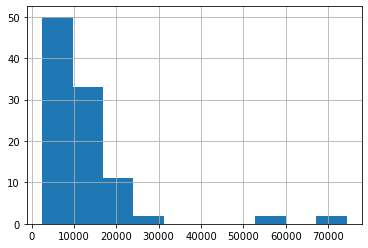

In [224]:
avg_payment['Annual_Salary'] = avg_payment['amount']*365.25/avg_payment['Duration']
avg_payment['Annual_Salary'].hist()

In [225]:
features_df = features_df.merge(avg_payment[['customer_id','Annual_Salary','age']],how='left',on='customer_id')
features_df.head()

,customer_id,balance,gender_F,gender_M,Num_transactions,Annual_Salary,age
0,CUS-1005756958,1746.575833,1,0,60,4219.811518,53
1,CUS-1117979751,9669.811613,0,1,93,15560.737054,21
2,CUS-1140341822,5687.657568,0,1,74,10000.075393,28
3,CUS-1147642491,9060.001714,1,0,105,7441.490446,34
4,CUS-1196156254,22226.160714,1,0,238,16974.254554,34


In [226]:
salary_df = pd.merge(salary_df[['transaction_id','amount']],df,on=['amount','transaction_id'])
salary_df.head()

,transaction_id,amount,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,...,merchant_suburb,merchant_state,extraction,country,customer_id,merchant_long_lat,movement,Day_name,gender_F,gender_M
0,00ddc65eb7674cfdbeee864ef245e2e5,996.24,posted,NaN,0,ACC-1443681913,AUD,150.92 -33.77,PAY/SALARY,NaN,...,NaN,NaN,2018-08-21 13:00:00+00:00,Australia,CUS-3129499595,NaN,credit,Tuesday,0,1
1,00e97a9be9654405bb44f96e748b3ace,1098.91,posted,NaN,0,ACC-1973887809,AUD,115.78 -31.90,PAY/SALARY,NaN,...,NaN,NaN,2018-08-01 16:00:00+00:00,Australia,CUS-1646621553,NaN,credit,Wednesday,0,1
2,010f04dbb9cc4ed2bfe82c7f08b8dc0b,983.36,posted,NaN,0,ACC-3326339947,AUD,151.18 -33.80,PAY/SALARY,NaN,...,NaN,NaN,2018-09-26 12:00:00+00:00,Australia,CUS-326006476,NaN,credit,Wednesday,0,1
3,0165224903084eb3b25b17a419bd17eb,2101.51,posted,NaN,0,ACC-3536132544,AUD,144.93 -37.79,PAY/SALARY,NaN,...,NaN,NaN,2018-09-06 11:00:00+00:00,Australia,CUS-2348881191,NaN,credit,Thursday,1,0
4,0199e2cd0eb84bc796994d194dca0b90,725.32,posted,NaN,0,ACC-53508546,AUD,150.62 -33.76,PAY/SALARY,NaN,...,NaN,NaN,2018-09-06 17:00:00+00:00,Australia,CUS-72755508,NaN,credit,Thursday,1,0


In [231]:
px.histogram(features_df,'Annual_Salary',nbins=50)

In [237]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       100 non-null    object 
 1   balance           100 non-null    float64
 2   gender_F          100 non-null    uint8  
 3   gender_M          100 non-null    uint8  
 4   Num_transactions  100 non-null    int64  
 5   Annual_Salary     100 non-null    float64
 6   age               100 non-null    int64  
dtypes: float64(2), int64(2), object(1), uint8(2)
memory usage: 4.9+ KB


In [248]:
import statsmodels.api as sm
X_data = features_df.drop(columns=['Annual_Salary','customer_id'])
y_data = features_df['Annual_Salary']
model = sm.OLS(y_data.to_numpy(),X_data.to_numpy())
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.072
Date:                Mon, 15 Mar 2021   Prob (F-statistic):              0.375
Time:                        15:04:58   Log-Likelihood:                -1080.6
No. Observations:                 100   AIC:                             2171.
Df Residuals:                      95   BIC:                             2184.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0409      0.036      1.130      0.261      -0.031       0.113
x2          1.444e+04   4685.227      3.081      0.003    5135.652    2.37e+04
x3          1.708e+04   4466.054      3.825      0.000    8215.890    2.59e+04
x4             4.9587     17.082      0.290      0.772     -28.954      38.871
x5          -157.2803    110.951     -1.418      0.160    -377.546      62.985
==============================================================================
Omnibus:                       98.102   Durbin-Watson:                   2.167
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              855.818
Skew:                           3.392   Prob(JB):                    1.45e-186
Kurtosis:                      15.624   Cond. No.                     2.00e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [259]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_data, y_data)

KNeighborsRegressor(n_neighbors=2)

In [260]:
neigh.score(X_data,y_data)

0.5192856308993681

In [261]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_data, y_data)
reg.score(X_data, y_data)

0.04319488240954916